In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
# import rapids_singlecell as rsc
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import session_info
session_info.show()

/home/kk837/.conda/envs/generic_env/lib/python3.10/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


In [3]:
sc.settings.set_figure_params(dpi=120)

# Read in

In [4]:
objects_dir = '/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium'
path_adata = f'{objects_dir}/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_me

In [5]:
latent_space = 'pca_harmony'

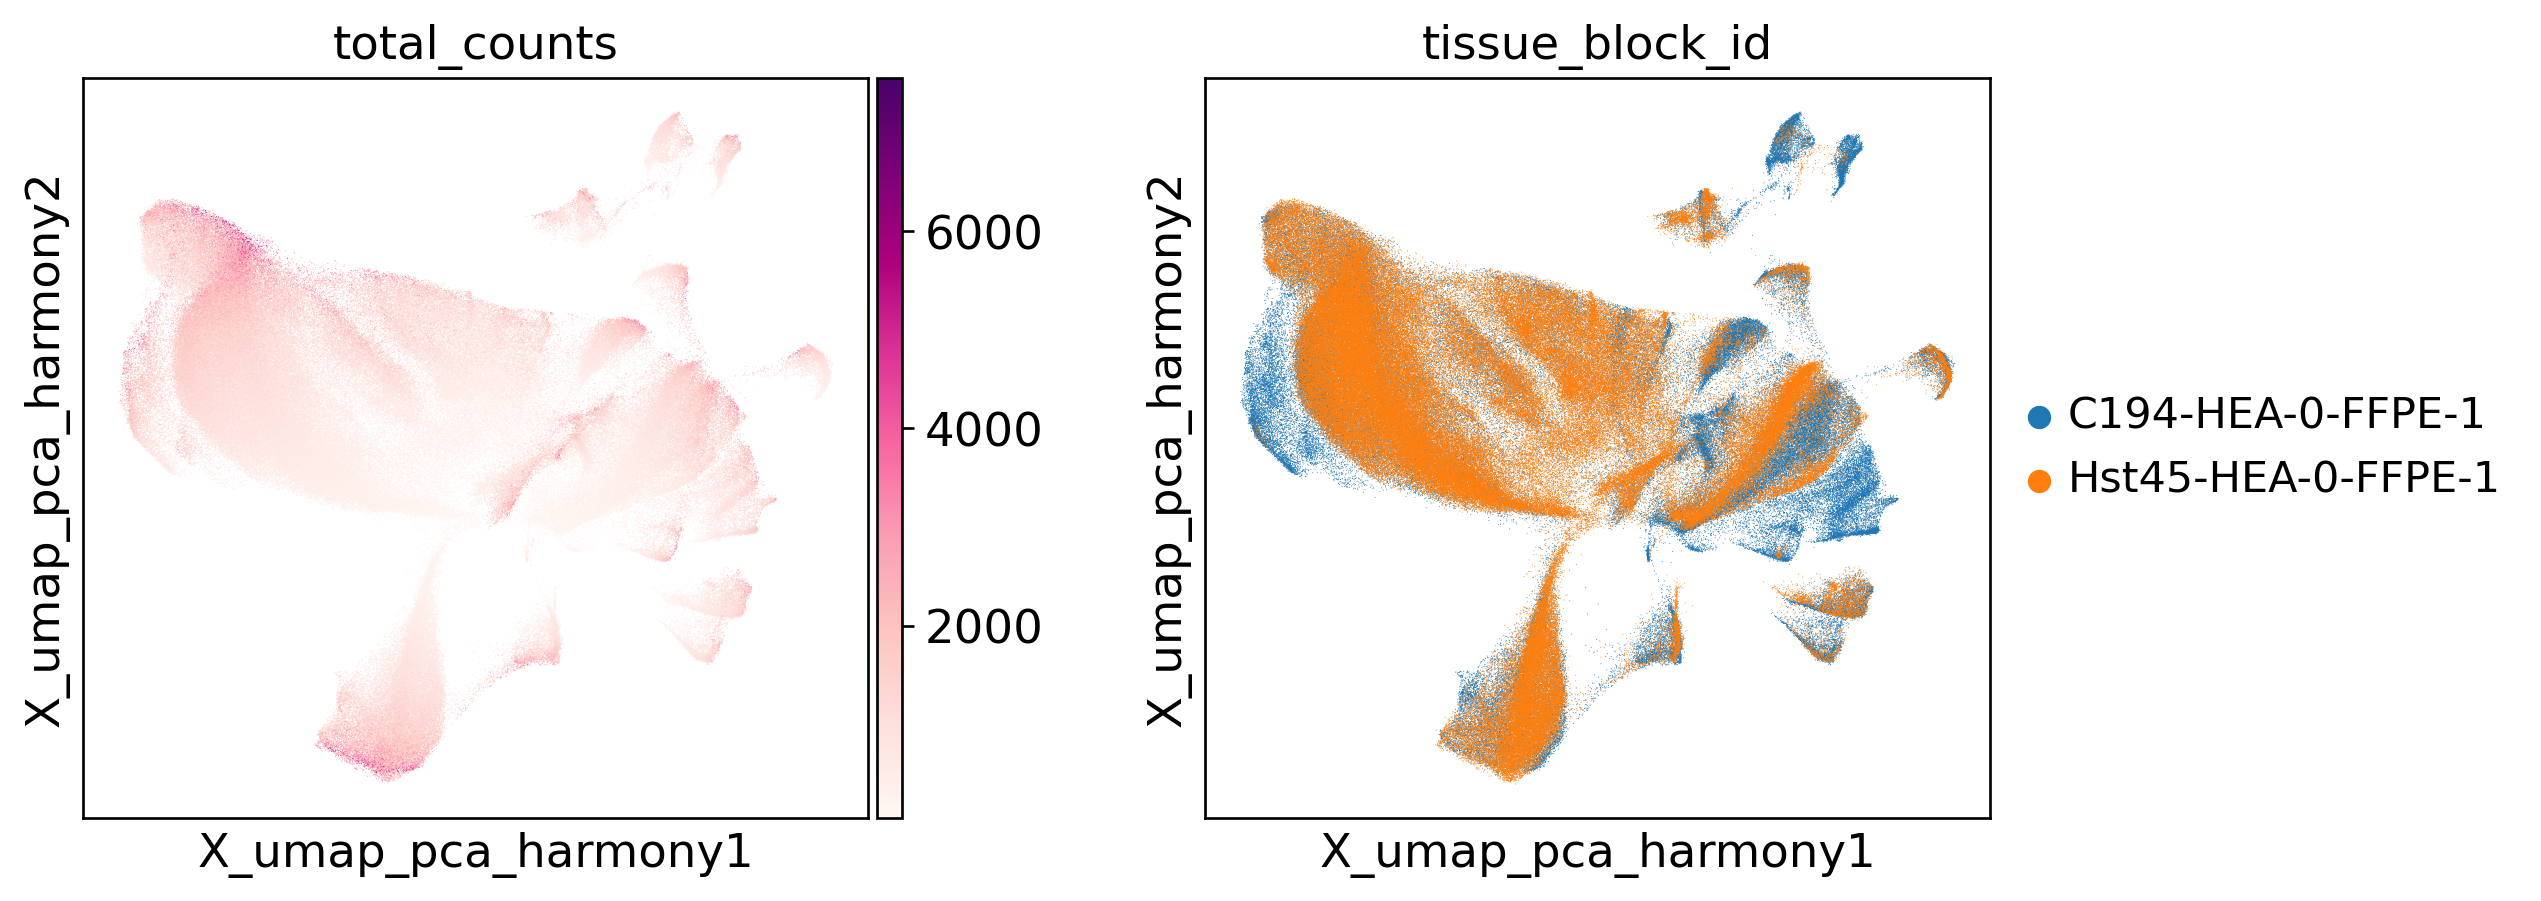

In [6]:
sc.pl.embedding(adata, basis=f"X_umap_{latent_space}",
                color=['total_counts','tissue_block_id'], wspace=0.3, cmap='RdPu')

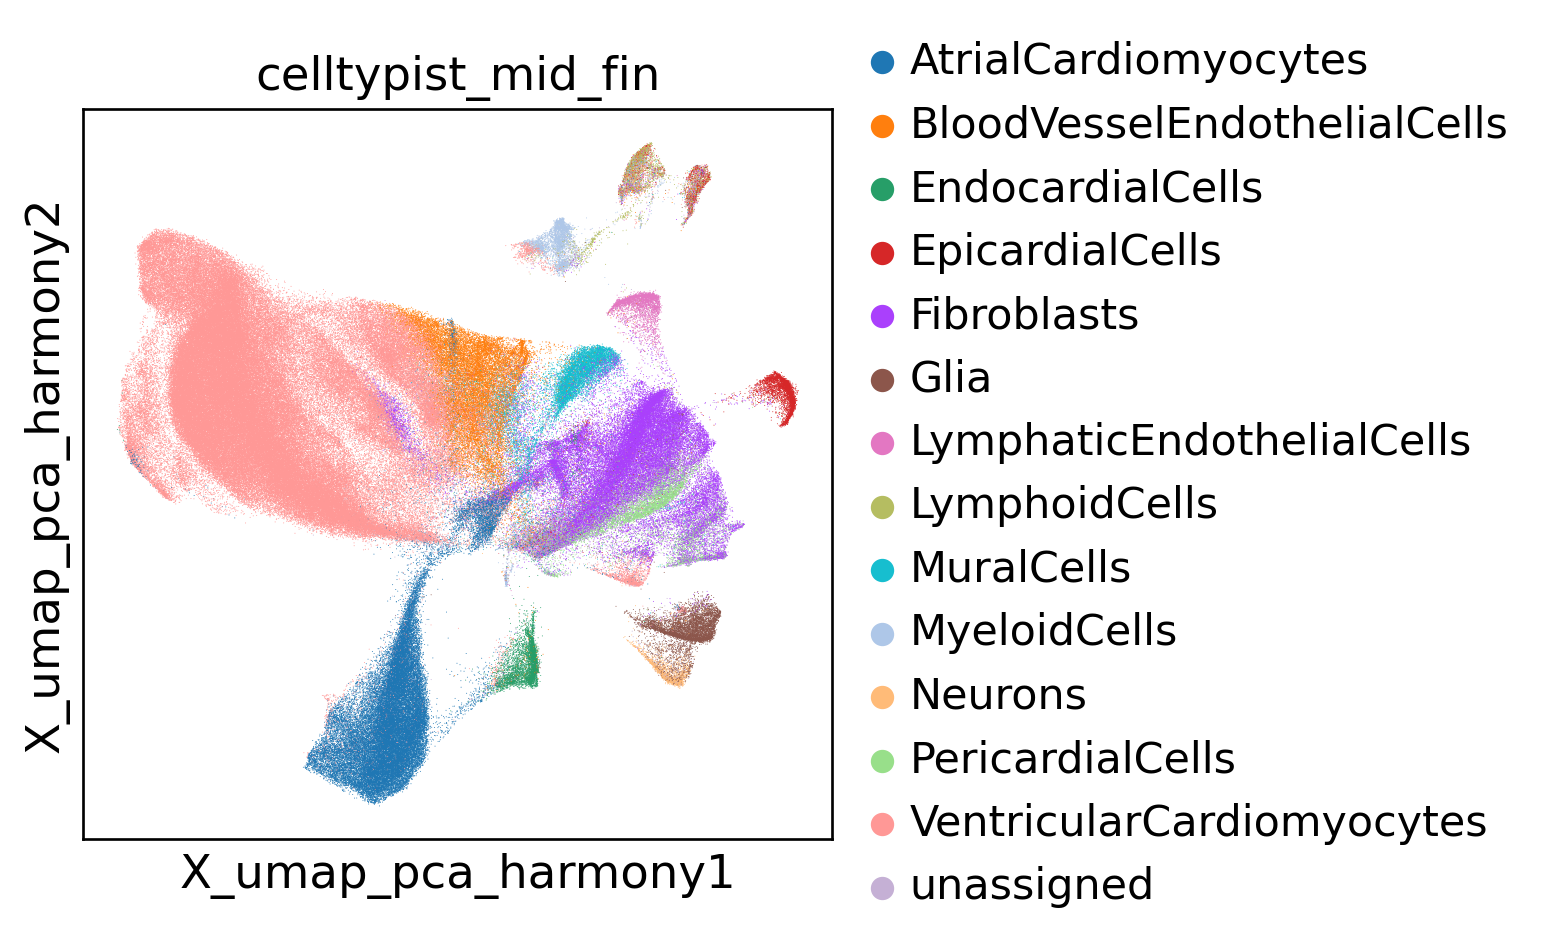

In [7]:
sc.pl.embedding(adata, basis=f"X_umap_{latent_space}",
                color=['celltypist_mid_fin'], wspace=0.2, cmap='RdPu')

# Clustering

In [8]:
%%time
latent_space='pca_harmony'
leiden_keys=[]
for res in tqdm([0.2,0.3,0.4,0.5,0.8,1.0,1.5,2.0,3.0]):
    leiden_key = f"leiden_{res}"
    key_added=f"{latent_space}_{leiden_key}"
    sc.tl.leiden(adata,neighbors_key=latent_space,resolution=res,key_added=key_added)
    leiden_keys.append(key_added)

  0%|          | 0/9 [00:00<?, ?it/s]

<timed exec>:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


 11%|█         | 1/9 [07:39<1:01:13, 459.19s/it]

 22%|██▏       | 2/9 [19:30<1:10:50, 607.25s/it]

 33%|███▎      | 3/9 [33:44<1:12:01, 720.18s/it]

 44%|████▍     | 4/9 [47:17<1:03:03, 756.76s/it]

 56%|█████▌    | 5/9 [54:49<43:08, 647.04s/it]  

 67%|██████▋   | 6/9 [1:11:29<38:20, 766.86s/it]

 78%|███████▊  | 7/9 [1:34:34<32:18, 969.11s/it]

 89%|████████▉ | 8/9 [1:47:13<15:01, 901.98s/it]

100%|██████████| 9/9 [2:03:02<00:00, 916.69s/it]

100%|██████████| 9/9 [2:03:02<00:00, 820.25s/it]

CPU times: user 2h 2min 7s, sys: 46 s, total: 2h 2min 53s
Wall time: 2h 3min 2s


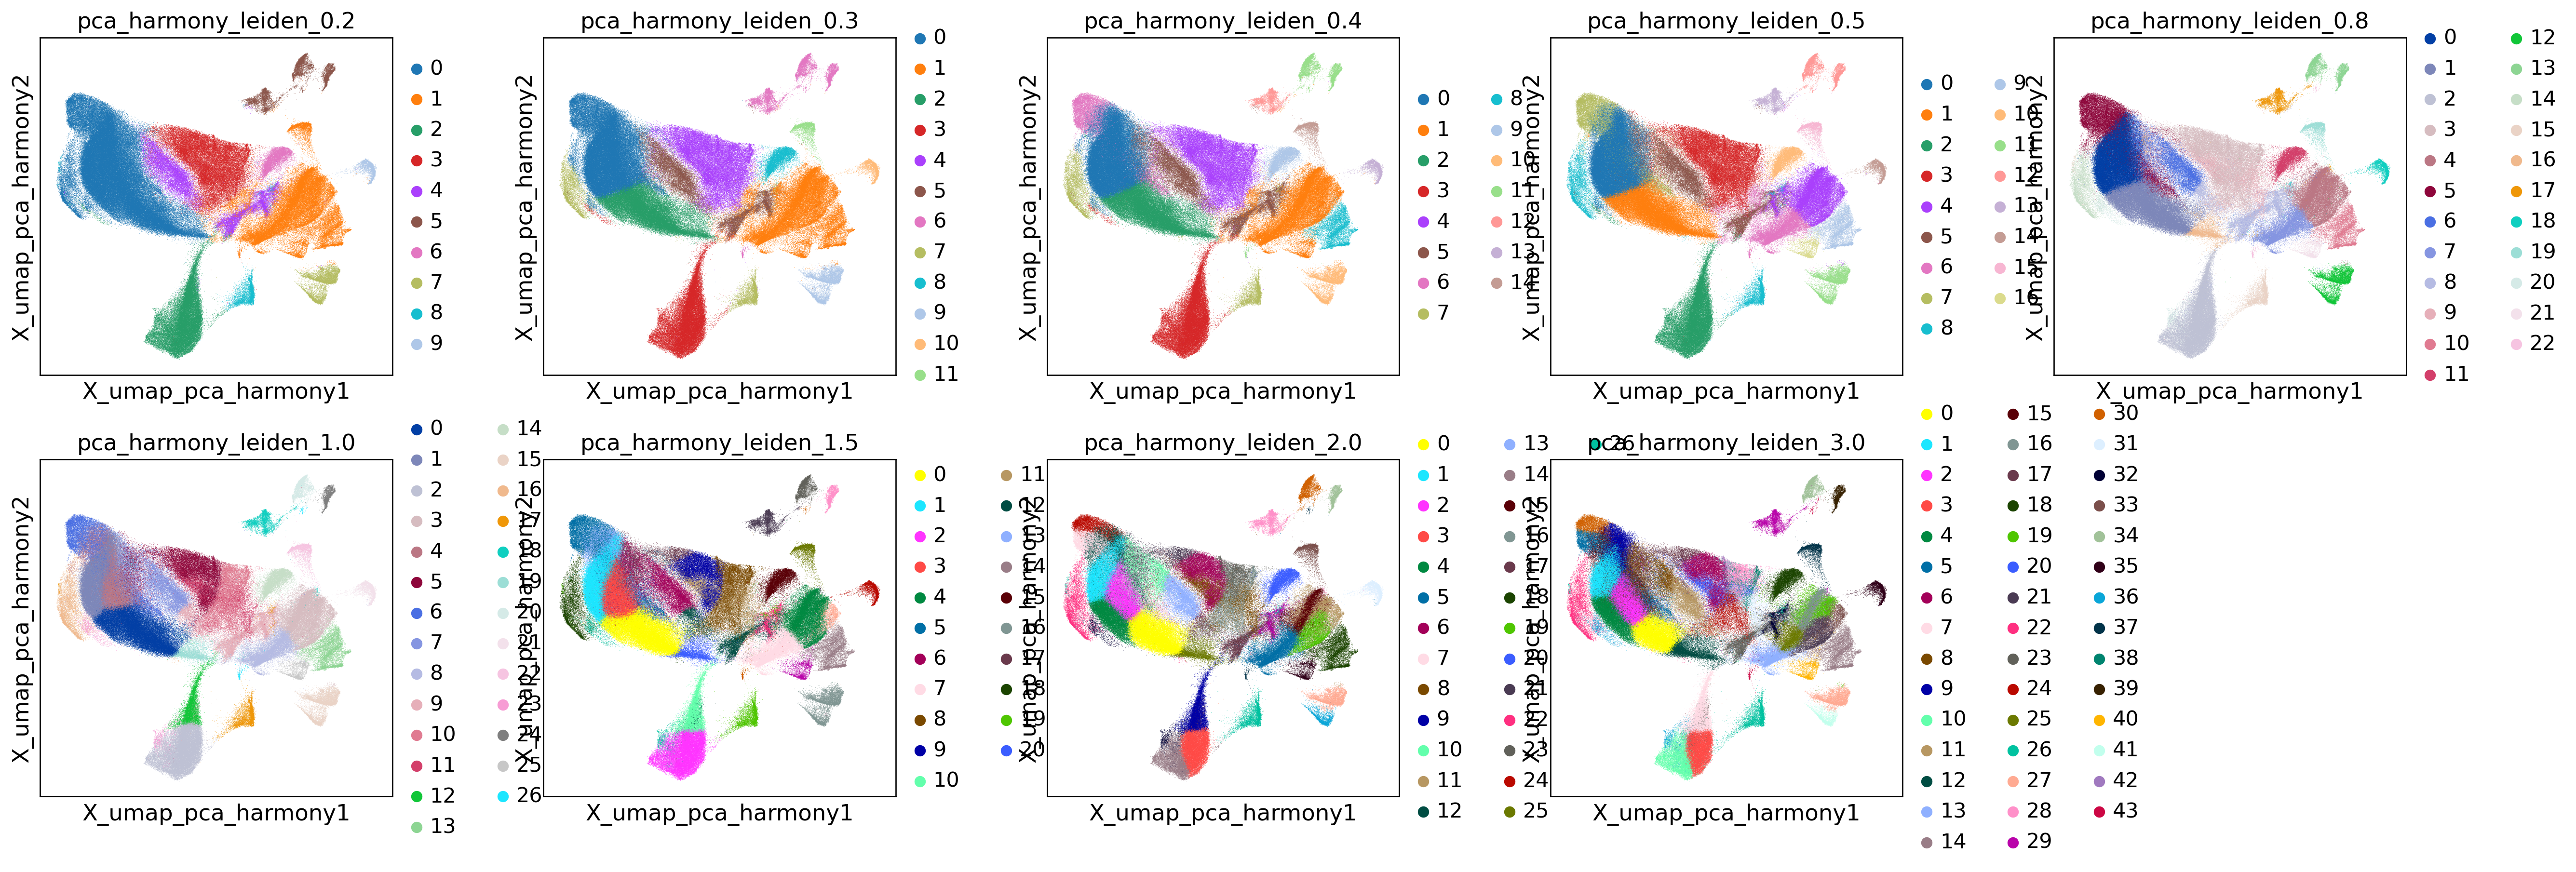

In [9]:
sc.pl.embedding(adata,basis=f"X_umap_{latent_space}",
                color=leiden_keys,wspace=0.3,ncols=5)

# Save

In [10]:
adata.write(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'pca_harmony_leiden_0.2', 'pca_harmony_leiden_0.3', 'pca_harmony_leiden_0.4', 'pca_harmony_leiden_0.5', 'pca_harmony_leiden_0.8', 'pca_harmony_leiden_1.0', 'pca_harmony_leiden_1.5', 'pca_harmony_leiden_2.0', 'pca_harmony_leiden_